In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
#load the data in a DataFrame (DF) named df
df = pd.read_csv("C:\\Users\\ss3727s\\Assignment 635\\Assignment 1\\Part 2\\ramen-ratings.csv", index_col ="Review #",dtype={"Stars":np.float64},na_values="Unrated")

In [77]:
#Find the names of the columns.
df.columns

Index(['Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [78]:
#Use the head function to view parts of the data.
df.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [79]:
#Find the number of observations in the dataset.
df.shape

(2580, 6)

In [80]:
#Use the describe function to get basic statistics about the numerical attributes.
df.describe()

,Stars
count,2577.000000
mean,3.654676
std,1.015331
min,0.000000
25%,3.250000
50%,3.750000
75%,4.250000
max,5.000000


In [81]:
#Use the describe function to get basic statistics about all attributes.
df.describe(include = 'all')

,Brand,Variety,Style,Country,Stars,Top Ten
count,2580,2580,2578,2580,2577.000000,41
unique,355,2413,7,38,NaN,38
top,Nissin,Chicken,Pack,Japan,NaN,\n
freq,381,7,1531,352,NaN,4
mean,NaN,NaN,NaN,NaN,3.654676,NaN
std,NaN,NaN,NaN,NaN,1.015331,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,3.250000,NaN
50%,NaN,NaN,NaN,NaN,3.750000,NaN
75%,NaN,NaN,NaN,NaN,4.250000,NaN


In [82]:
#Find the number of null values in the dataset and replace them with appropriate value. 
df.isnull().sum()

Brand         0
Variety       0
Style         2
Country       0
Stars         3
Top Ten    2539
dtype: int64

In [83]:
# Stars has three NaN value which was replaced by 'Unrated' in first instruction
# Dropping 'Top Ten' column 
df.drop(columns = ['Top Ten'], inplace = True)

# What brand has the most stars on average?

In [84]:
df['Stars']

Review #
2580    3.75
2579    1.00
2578    2.25
2577    2.75
2576    3.75
        ... 
5       3.50
4       1.00
3       2.00
2       2.00
1       0.50
Name: Stars, Length: 2580, dtype: float64

In [85]:
#Get the average amount of stars per brand
averageStarsByBrand = df['Stars'].groupby(df['Brand']).mean()
averageStarsByBrand

Brand
1 To 3 Noodles      4.000000
7 Select            3.750000
7 Select/Nissin     3.500000
A-One               2.750000
A-Sha Dry Noodle    4.067308
                      ...   
Yum Yum             3.750000
Yum-Mie             3.500000
Zow Zow             3.750000
iMee                3.500000
iNoodle             3.000000
Name: Stars, Length: 355, dtype: float64

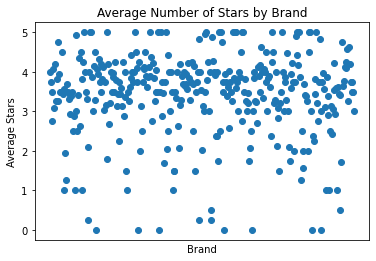

In [86]:
#Show data as a scatter plot
plt.scatter(np.arange(len(averageStarsByBrand)),averageStarsByBrand)
plt.ylabel("Average Stars")
plt.xlabel("Brand")
plt.xticks([])
plt.title("Average Number of Stars by Brand")
plt.show()

In [87]:
#Get basic statistics about the ‘Stars’ column using the describe function. 
#This helps give an idea about the min, max, median values of tip in addition to other basic statistics.
df['Stars'].describe()

count    2577.000000
mean        3.654676
std         1.015331
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

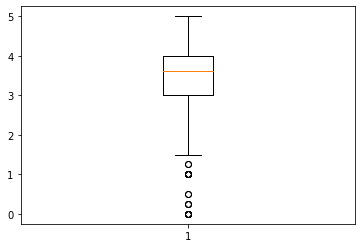

In [88]:
#Draw a boxplot of the Stars column. This gives a visual representation of the Stars data and shows outliers.
plt.boxplot(averageStarsByBrand)
plt.show()

In [89]:
#Group companies by their average star ratings
nostar = len(averageStarsByBrand[averageStarsByBrand < 1.0]) / len(averageStarsByBrand)
onestar = len(averageStarsByBrand[(averageStarsByBrand < 2.0) & (averageStarsByBrand >= 1.0)]) / len(averageStarsByBrand)
twostar = len(averageStarsByBrand[(averageStarsByBrand < 3.0) & (averageStarsByBrand >= 2.0)]) / len(averageStarsByBrand)
threestar = len(averageStarsByBrand[(averageStarsByBrand < 4.0) & (averageStarsByBrand >= 3.0)]) / len(averageStarsByBrand)
fourstar = len(averageStarsByBrand[(averageStarsByBrand < 5.0) & (averageStarsByBrand >= 4.0)]) / len(averageStarsByBrand)
fivestar = len(averageStarsByBrand[(averageStarsByBrand == 5.0)]) / len(averageStarsByBrand)

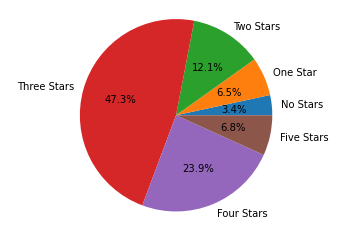

In [90]:
plt.pie([nostar,onestar,twostar,threestar,fourstar,fivestar],labels=["No Stars","One Star","Two Stars","Three Stars","Four Stars","Five Stars"],autopct="%1.1f%%")
plt.axis('equal')
plt.show()

# Which one is the most popular style of ramen?

In [91]:
#Apply the describe function on the “Style” column of the ramen DF and observe the result.
df['Style'].describe()

count     2578
unique       7
top       Pack
freq      1531
Name: Style, dtype: object

In [92]:
#Find the most popular style of ramen
df['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [93]:
#Create a bar chart comparing the number of styles each country produce. 
#Give labels to the x-axis = ‘Countries’, y-axis = ‘Total Number of Styles’ and title = ‘Country-Wise Ramen Style’.
CountrywiseStyle = df['Style'].groupby(df['Country']).count()
CountrywiseStyle

Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            168
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         156
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           223
Thailand         191
UK                69
USA              323
United States      1
Vietnam          108
Name: Style, dtype: int64

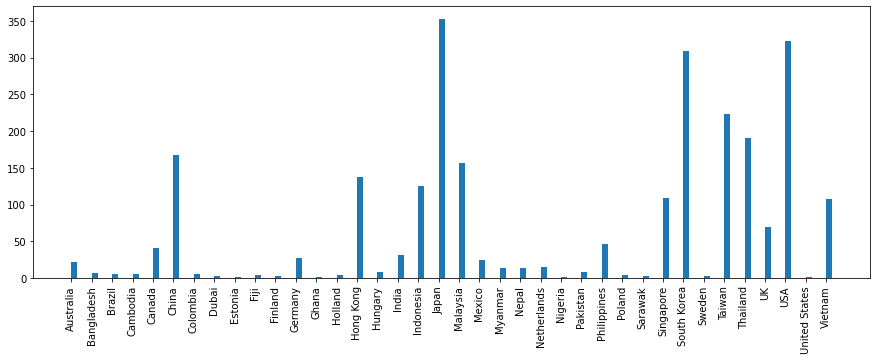

In [94]:
plt.figure(figsize=(15, 5))
plt.bar(CountrywiseStyle.index,CountrywiseStyle, align='edge', width=0.3)
plt.tick_params(axis='x', rotation=90)
plt.show()